In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [40]:
noncovid_path = '/kaggle/input/sarscov2-ctscan-dataset/non-COVID'
covid_path = '/kaggle/input/sarscov2-ctscan-dataset/COVID'

# Function to load images and create labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(200, 200))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

In [41]:
noncovid_images, noncovid_labels = load_images_from_folder(noncovid_path, 0)

In [43]:
covid_images, covid_labels = load_images_from_folder(covid_path, 1)

In [44]:
images = np.concatenate((noncovid_images, covid_images), axis=0)
labels = np.concatenate((noncovid_labels, covid_labels), axis=0)

# Create a combined array of images and labels
combined = list(zip(images, labels))

# Shuffle the combined data
np.random.shuffle(combined)

# Separate images and labels after shuffling
shuffled_images, shuffled_labels = zip(*combined)

# Convert back to numpy arrays
shuffled_images = np.array(shuffled_images)
shuffled_labels = np.array(shuffled_labels)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(shuffled_images, shuffled_labels, test_size=0.2, random_state=42)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [46]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1984, 200, 200, 3)
y_train shape: (1984,)
x_test shape: (497, 200, 200, 3)
y_test shape: (497,)


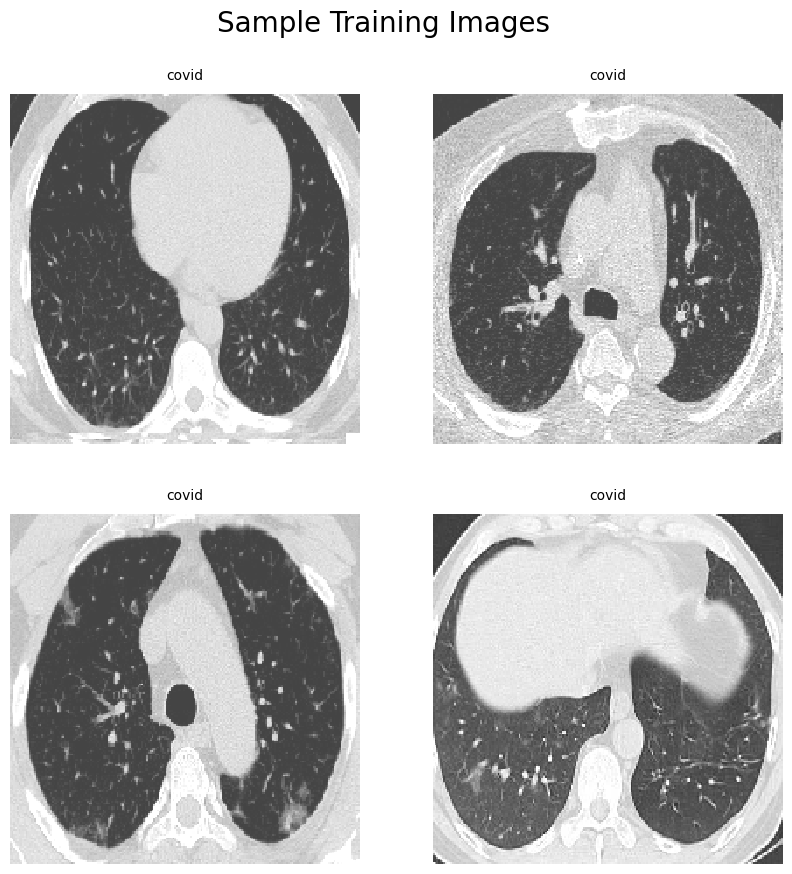

In [47]:
import matplotlib.pyplot as plt

# Define label names
label_names = {0: 'noncovid', 1: 'covid'}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.text(0.5, 0.95, "Sample Training Images", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    ax.matshow(x_train[i])
    label = label_names[y_train[i]]  # Get label name from label_names dictionary
    ax.text(0.5, 1.05, label, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.axis('off')

plt.show()

In [48]:
import os
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Adjust learning rate if needed
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6157 - loss: 2.9673 - val_accuracy: 0.7565 - val_loss: 2.5577
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6971 - loss: 2.5109 - val_accuracy: 0.7867 - val_loss: 2.1960
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7156 - loss: 2.2326 - val_accuracy: 0.8229 - val_loss: 1.9431
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7914 - loss: 1.9473 - val_accuracy: 0.8008 - val_loss: 1.7809
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8106 - loss: 1.7664 - val_accuracy: 0.8330 - val_loss: 1.6095
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8237 - loss: 1.6207 - val_accuracy: 0.8551 - val_loss: 1.4626
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8424 - loss: 1.4782 - val_accuracy: 0.8350 - val_loss: 1.4147
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8499 - loss: 1.3751 - val_accuracy: 0.8652 -

In [49]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,677,317 (40.73 MB)

 Trainable params: 3,559,105 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,118,212 (27.15 MB)

In [50]:
model.evaluate(x_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9052 - loss: 0.6994


[0.7301256060600281, 0.895372211933136]

In [51]:
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


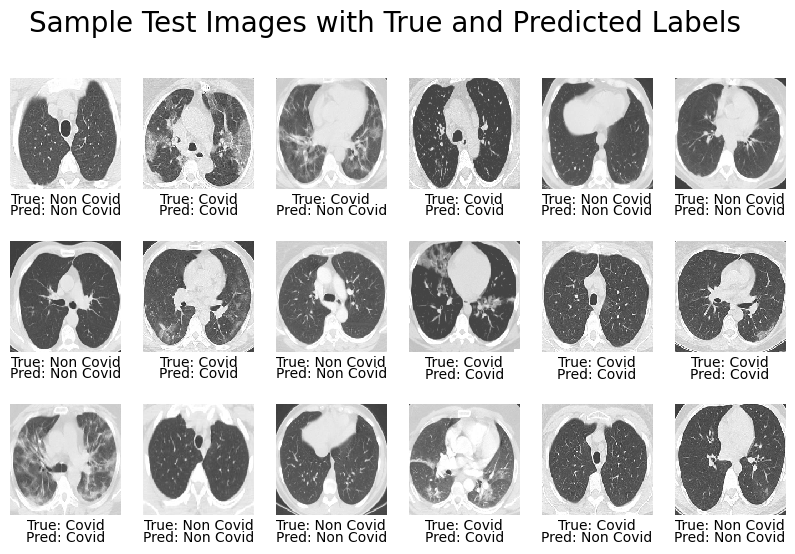

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define label names
label_names = {0: 'Non Covid', 1: 'Covid'}

# Visualize sample images along with true and predicted labels
fig, axes = plt.subplots(3,6, figsize=(10, 6))
fig.text(0.5, 0.95, "Sample Test Images with True and Predicted Labels", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    # Reshape the flattened image to its original shape (512, 512, 3)
    original_shape_image = x_test[i]
    
    # Display the test image
    ax.matshow(original_shape_image)
    
    # True label
    true_label = label_names[y_test[i]]  
    # Predicted label
    if y_pred[i] > 0.5:
        pred_label = 'Covid'
    else:
        pred_label = 'Non Covid'
    
    # Display true and predicted labels
    ax.text(0.5, -0.1, f"True: {true_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, -0.2, f"Pred: {pred_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    ax.axis('off')

plt.show()